In [1]:
import iss_preprocess as iss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from flexiznam.config import PARAMETERS
from pathlib import Path
from itertools import cycle
from matplotlib.animation import FuncAnimation

import scanpy as sc
import re
import seaborn as sns
import bg_atlasapi as bga
from tqdm import tqdm

In [2]:
data_path = "/nemo/lab/znamenskiyp/home/users/becalia/data/BRYC65.1d/"
save_path = ""

In [3]:
genes_df = pd.read_pickle(f"{data_path}roi1_2_5_6_genes_df_max_cell.pkl")
barcode_df = pd.read_pickle(f"{data_path}roi1_2_5_6_barcode_df_max_cell.pkl")
cell_df = pd.read_pickle(f"{data_path}roi1_2_5_6_cell_df_max_cell.pkl")

# Create adata object for cell analysis

In [4]:
cell_df_all = cell_df[cell_df.index.isin(genes_df.index)]
genes_df_all = genes_df[genes_df.index.isin(cell_df.index)]
# remove roi column from genes_df_all
genes_df_all = genes_df_all.drop("roi", axis=1)

adata = sc.AnnData(genes_df_all)
adata.obs = cell_df_all
adata.obs.index = adata.obs.index.astype(str)
adata.var.index = adata.var.index.astype(str)

# Add fine area info
areas = adata.obs.area_acronym.to_list()
layer = out = [re.sub(r"\D", "", s) for s in areas]
adata.obs["layer"] = layer
barcode_sum_df = barcode_df.sum(axis=1).to_frame()
barcode_sum_df.index.names = ["label"]
barcode_sum_df = barcode_sum_df[
    barcode_sum_df.index.isin(adata.obs.index.astype("int"))
]
barcode_sum_df.reindex(adata.obs.index.astype(int).to_list())
barcode_sum_df.index = barcode_sum_df.index.astype("str")
adata.obs["sum_barcode_counts"] = barcode_sum_df

/tmp/ipykernel_95644/451160359.py:6: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(genes_df_all)
/camp/home/blota/.conda/envs/iss-preprocess/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/camp/home/blota/.conda/envs/iss-preprocess/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 4, 6, 8]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/tmp/ipykernel_95644/451160359.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

# Define area of brain used for clustering

In [5]:
atlas_name = "allen_mouse_%dum" % 10
# atlas at '/nemo/lab/znamenskiyp/home/shared/resources/.brainglobe/'
bg_atlas = bga.bg_atlas.BrainGlobeAtlas(atlas_name)

# Generate Isocortex and visual cortex subsets
isocortex_acronyms = bg_atlas.get_structure_descendants("Isocortex")
adata_iso = adata[adata.obs.area_acronym.isin(isocortex_acronyms)].copy()

isocortex_cropped_acronyms = [
    "FRP",
    "FRP1",
    "FRP2/3",
    "FRP5",
    "FRP6a",
    "FRP6b",
    "MO",
    "MOp",
    "MOp1",
    "MOp2/3",
    "MOp5",
    "MOp6a",
    "MOp6b",
    "MOs",
    "MOs1",
    "MOs2/3",
    "MOs5",
    "MOs6a",
    "MOs6b",
    "SS",
    "SSp",
    "SSp-n",
    "SSp-n1",
    "SSp-n2/3",
    "SSp-n4",
    "SSp-n5",
    "SSp-n6a",
    "SSp-n6b",
    "SSp-bfd",
    "SSp-bfd1",
    "SSp-bfd2/3",
    "SSp-bfd4",
    "SSp-bfd5",
    "SSp-bfd6a",
    "SSp-bfd6b",
    "SSp-ll",
    "SSp-ll1",
    "SSp-ll2/3",
    "SSp-ll4",
    "SSp-ll5",
    "SSp-ll6a",
    "SSp-ll6b",
    "SSp-m",
    "SSp-m1",
    "SSp-m2/3",
    "SSp-m4",
    "SSp-m5",
    "SSp-m6a",
    "SSp-m6b",
    "SSp-ul",
    "SSp-ul1",
    "SSp-ul2/3",
    "SSp-ul4",
    "SSp-ul5",
    "SSp-ul6a",
    "SSp-ul6b",
    "SSp-tr",
    "SSp-tr1",
    "SSp-tr2/3",
    "SSp-tr4",
    "SSp-tr5",
    "SSp-tr6a",
    "SSp-tr6b",
    "SSp-un",
    "SSp-un1",
    "SSp-un2/3",
    "SSp-un4",
    "SSp-un5",
    "SSp-un6a",
    "SSp-un6b",
    "SSs",
    "SSs1",
    "SSs2/3",
    "SSs4",
    "SSs5",
    "SSs6a",
    "SSs6b",
    "GU",
    "GU1",
    "GU2/3",
    "GU4",
    "GU5",
    "GU6a",
    "GU6b",
    "VISC",
    "VISC1",
    "VISC2/3",
    "VISC4",
    "VISC5",
    "VISC6a",
    "VISC6b",
    "AUD",
    "AUDd",
    "AUDd1",
    "AUDd2/3",
    "AUDd4",
    "AUDd5",
    "AUDd6a",
    "AUDd6b",
    "AUDv",
    "AUDv1",
    "AUDv2/3",
    "AUDv4",
    "AUDv5",
    "AUDv6a",
    "AUDv6b",
    "AUDp",
    "AUDp1",
    "AUDp2/3",
    "AUDp4",
    "AUDp5",
    "AUDp6a",
    "AUDp6b",
    "AUDpo",
    "AUDpo1",
    "AUDpo2/3",
    "AUDpo4",
    "AUDpo5",
    "AUDpo6a",
    "AUDpo6b",
    "VIS",
    "VISal",
    "VISal1",
    "VISal2/3",
    "VISal4",
    "VISal5",
    "VISal6a",
    "VISal6b",
    "VISam",
    "VISam1",
    "VISam2/3",
    "VISam4",
    "VISam5",
    "VISam6a",
    "VISam6b",
    "VISl",
    "VISl1",
    "VISl2/3",
    "VISl4",
    "VISl5",
    "VISl6a",
    "VISl6b",
    "VISp",
    "VISp1",
    "VISp2/3",
    "VISp4",
    "VISp5",
    "VISp6a",
    "VISp6b",
    "VISpl",
    "VISpl1",
    "VISpl2/3",
    "VISpl4",
    "VISpl5",
    "VISpl6a",
    "VISpl6b",
    "VISpm",
    "VISpm1",
    "VISpm2/3",
    "VISpm4",
    "VISpm5",
    "VISpm6a",
    "VISpm6b",
    "VISli",
    "VISli1",
    "VISli2/3",
    "VISli4",
    "VISli5",
    "VISli6a",
    "VISli6b",
    "VISpor",
    "VISpor1",
    "VISpor2/3",
    "VISpor4",
    "VISpor5",
    "VISpor6a",
    "VISpor6b",
    "ACA",
    "ACAd",
    "ACAd1",
    "ACAd2/3",
    "ACAd5",
    "ACAd6a",
    "ACAd6b",
    "ACAv",
    "ACAv1",
    "ACAv2/3",
    "ACAv5",
    "ACAv6a",
    "ACAv6b",
    "PL",
    "PL1",
    "PL2/3",
    "PL5",
    "PL6a",
    "PL6b",
    "ILA",
    "ILA1",
    "ILA2/3",
    "ILA5",
    "ILA6a",
    "ILA6b",
    "ORB",
    "ORBl",
    "ORBl1",
    "ORBl2/3",
    "ORBl5",
    "ORBl6a",
    "ORBl6b",
    "ORBm",
    "ORBm1",
    "ORBm2/3",
    "ORBm5",
    "ORBm6a",
    "ORBm6b",
    "ORBvl",
    "ORBvl1",
    "ORBvl2/3",
    "ORBvl5",
    "ORBvl6a",
    "ORBvl6b",
    "AI",
    "AId",
    "AId1",
    "AId2/3",
    "AId5",
    "AId6a",
    "AId6b",
    "AIp",
    "AIp1",
    "AIp2/3",
    "AIp5",
    "AIp6a",
    "AIp6b",
    "AIv",
    "AIv1",
    "AIv2/3",
    "AIv5",
    "AIv6a",
    "AIv6b",
    "RSP",
    "RSPagl",
    "RSPagl1",
    "RSPagl2/3",
    "RSPagl5",
    "RSPagl6a",
    "RSPagl6b",
    "RSPd",
    "RSPd1",
    "RSPd2/3",
    "RSPd4",
    "RSPd5",
    "RSPd6a",
    "RSPd6b",
    "RSPv",
    "RSPv5",
    "RSPv6a",
    "RSPv6b",
    "PTLp",
    "VISa",
    "VISa1",
    "VISa2/3",
    "VISa4",
    "VISa5",
    "VISa6a",
    "VISa6b",
    "VISrl",
    "VISrl1",
    "VISrl2/3",
    "VISrl4",
    "VISrl5",
    "VISrl6a",
    "VISrl6b",
]

# no 'RSPv1','RSPv2/3', TEa, ECT, PERI

fiber_acronyms = [
    "scwm",
    "amc",
    "ee",
    "cc",
    "cing",
    "or",
    "ar",
    "fa",
    "ccg",
    "fp",
    "ccb",
    "ccs",
]  # don't include 'dhc', 'ec', 'ec','alv','ec', 'ee',
expanded_iso_acronyms = isocortex_cropped_acronyms + fiber_acronyms
adata_iso_expanded = adata[adata.obs.area_acronym.isin(expanded_iso_acronyms)].copy()

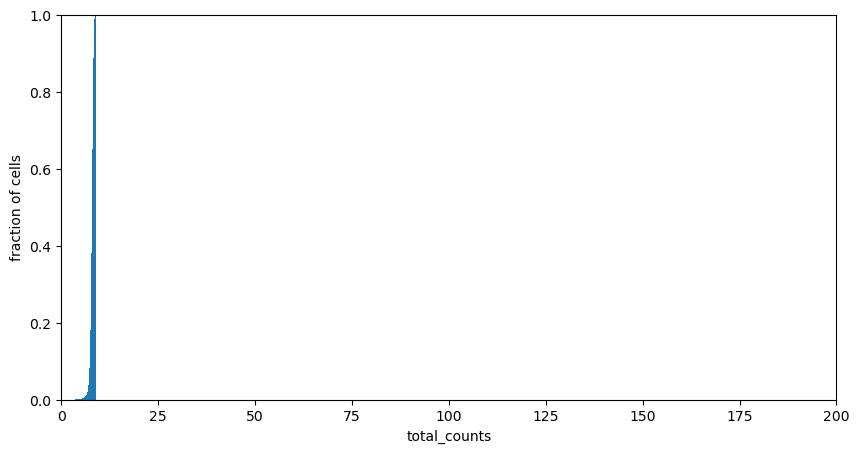

ValueError: Found array with 0 sample(s) (shape=(0, 87)) while a minimum of 1 is required by PCA.

In [7]:
# Make a plot of cumulative distribution of total_counts
sc.pp.calculate_qc_metrics(
    adata_iso_expanded, percent_top=None, log1p=False, inplace=True
)
plt.figure(figsize=(10, 5))
plt.hist(adata_iso_expanded.obs.total_counts, bins=1000, cumulative=True, density=True)
plt.xlabel("total_counts")
plt.ylabel("fraction of cells")
plt.xlim(0, 200)
plt.ylim(0, 1)
plt.show()

min_genes = 4
min_counts = 30
max_counts = 150
for adata in [adata_iso_expanded]:  # adata,  adata_iso, adata_vis
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    sc.pp.filter_cells(adata, min_counts=min_counts)
    adata.raw = adata
    sc.pp.normalize_total(adata, target_sum=10)
    sc.pp.log1p(adata)
    sc.tl.pca(adata, svd_solver="arpack")
    sc.pl.pca_variance_ratio(adata, log=True, show=False)
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
    sc.tl.umap(adata, min_dist=0.05)
    sc.tl.leiden(adata, resolution=1.3)

### As UMAP and leiden are not deterministic in scanpy, I've saved this version of the adata file that I clustered, so that annotations added in the next step stay consistent. Need to find a way to make this run the same every time regardless of processor architecture. Apparently there are some flags that have been added to scanpy settings to allow this?

In [ ]:
# The adata read here is updated to have the correct index names to match with the barcodes in barcode_df
adata_iso_expanded = sc.read_h5ad(
    "Z:/home/users/becalia/data/BRYC65.1d/adata_iso_expanded.h5ad"
)
adata_iso_expanded.obs.index = adata_iso_expanded.obs.barcode_index

In [ ]:
# Annotate leiden clusters with cluster names
adata_iso_expanded.obs["custom_leiden"] = adata_iso_expanded.obs.leiden.map(
    lambda x: {
        "0": "L2/3 IT 2",
        "1": "L4 IT",  #
        "2": "L6 CT",  # High Crym
        "3": "L5 IT",
        "4": "L5/6 IT",
        "5": "L2/3 RSP",  #
        "6": "Pvalb",  # High Pvalb, Pcp4l1, Kcnc2 -
        "7": "L5 PT",  # Was "L5 NP",
        "8": "Sst",  # High Sst -
        "9": "L2/3 IT 1",
        "10": "Unassigned",  # High Enpp2 but likely not Sncg
        "11": "Lamp5",
        "12": "Vip",  # High Vip -
        "13": "L4 RSP",  #    "L5 PT", # High Cplx1, Nefl, Pak1, Pde1a, location -
        "14": "L6b",  # High Ctgf, location -
        "15": "Car3",  # High Nr4a2 and Snypr -
        "16": "VLMC",  # High Nnat and Ptn, location -
        "17": "L5 NP",  # High Pcp4, Rgs4, Nrn1 Was L4/5 IT labeled before
        "18": "Unassigned",  # This was a small cluster with no markers
    }.get(x, x)
).astype("category")

# Define a custom color map for Leiden clusters
cluster_colors = cluster_colors = {
    "L2/3 IT 1": "#d62728",
    "L2/3 IT 2": "#ff7f0e",
    "L2/3 RSP": "#ffbb78",
    "L4 IT": "#dbdb8d",
    "L4 RSP": "#bcbd22",
    "L5 NP": "#98df8a",
    "L5 PT": "#2ca02c",
    "L5 IT": "palegreen",  # aec7e8
    "L5/6 IT": "#17becf",
    "L6 CT": "#c5b0d5",
    "L6b": "#9467bd",
    "Car3": "#e377c2",
    "Lamp5": "sienna",  # 8c564b
    "Pvalb": "#f7b6d2",
    "Sst": "darkslateblue",
    "Vip": "darkviolet",
    "Unassigned": "grey",
    "VLMC": "black",
}

adata_iso_expanded.obs["custom_colors"] = adata_iso_expanded.obs["custom_leiden"].map(
    cluster_colors
)

# Plot UMAP

In [ ]:
import warnings

warnings.simplefilter(action="ignore", category=DeprecationWarning)
sc.set_figure_params(figsize=(9, 9))
sc.pl.umap(
    adata_iso_expanded,
    use_raw=True,
    ncols=2,
    color=[
        "Slc17a7",
        "Gad1",
        "Sst",
        "Vip",
        "custom_leiden",
        "sum_barcode_counts",
        "total_counts",
        "n_genes_by_counts",
    ],
    palette=cluster_colors,
    frameon=False,
    size=30,
    vmax=["p99.5", "p98.9", "p99.9", "p99.9", None, 30, "p99.9", "p99.9"],
    legend_loc="on data",
    legend_fontsize=15,
    legend_fontoutline=2,
    show=False,
)
# plt.savefig(f'{save_path}umap_iso_expanded_barcodes.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
barcode_thresh = 5

fig, ax = plt.subplots()

# Plot the UMAP of the original data
umap_coords_expanded = adata_iso_expanded.obsm["X_umap"]
ax.scatter(
    umap_coords_expanded[:, 0],
    umap_coords_expanded[:, 1],
    c="darkgray",
    s=5,
    alpha=0.5,
    label="Original Data",
)

# Plot the UMAP of barcodes with counts above threshold on top
adata_subset = adata_iso_expanded[
    adata_iso_expanded.obs["sum_barcode_counts"] > barcode_thresh
]
sc.pl.umap(
    adata_subset,
    color=["sum_barcode_counts"],
    ncols=2,
    frameon=False,
    size=30,
    vmax=[30],
    legend_loc="on data",
    legend_fontsize=15,
    legend_fontoutline=2,
    show=False,
    ax=ax,
)
fig.savefig(f"{save_path}umap_iso_expanded_barcodes.svg", dpi=300, bbox_inches="tight")

# Show the combined plot
plt.show()

# Plot spatial data

In [ ]:
# Retrieve masks
all_cells_df = pd.DataFrame(
    columns=[
        "label",
        "y",
        "x",
        "area",
        "ymin",
        "xcol",
        "ymax",
        "xmax",
        "roi",
        "ara_x",
        "ara_y",
        "ara_z",
        "area_id",
        "area_acronym",
    ]
)
for roi in [1, 2, 5, 6]:
    big_mask = np.load(f"{data_path}masks_{roi}.npy")
    cell_df = iss.pipeline.make_cell_dataframe(
        data_path, roi, masks=big_mask, mask_expansion=None, atlas_size=10
    )
    all_cells_df = pd.concat([all_cells_df, cell_df])
pd.to_pickle(all_cells_df, f"{data_path}roi1_2_5_6_cell_df_whole_cortex.pkl")

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(
    x=adata_iso_expanded.obs.x[adata_iso_expanded.obs.roi == 1],
    y=adata_iso_expanded.obs.y[adata_iso_expanded.obs.roi == 1],
    hue=adata_iso_expanded.obs.custom_leiden[adata_iso_expanded.obs.roi == 1],
    palette=cluster_colors,
    # legend=False,
    s=30,
)


sns.scatterplot(
    x=all_cells_df[all_cells_df["roi"] == 1].x,
    y=all_cells_df[all_cells_df["roi"] == 1].y,
    c="gray",
    alpha=0.2,
    s=10,
)

plt.xlim(1000, 27000)
plt.ylim(3000, 19000)

plt.gca().set_aspect("equal")
plt.gca().invert_yaxis()
plt.axis("off")
# plt.savefig(f'{save_path}spatial_plot_umap_iso_expanded_roi1_cells.svg', dpi=600, bbox_inches='tight')
# plt.savefig(f'{save_path}spatial_plot_umap_iso_expanded_roi1_cells.png', dpi=600, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots arranged in a grid
n_clusters = adata_iso_expanded.obs.leiden.nunique()
ncols = 3  # Number of columns in the grid
nrows = (n_clusters + ncols - 1) // ncols  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))

# Iterate over the clusters and plot them in the grid
for i, ax in enumerate(axes.flatten()):
    if i < n_clusters:
        cluster_data = adata_iso_expanded.obs[
            (adata_iso_expanded.obs.roi == 1)
            & (adata_iso_expanded.obs.leiden == str(i))
        ]
        scatter = sns.scatterplot(
            x=cluster_data.x, y=cluster_data.y, hue=cluster_data.leiden, s=2, ax=ax
        )
        ax.set_title(f"{cluster_data.custom_leiden[0]}", color="white")
        ax.set_xlim(2000, 27000)
        ax.invert_yaxis()
        ax.axis("off")
        ax.set_aspect("equal")
        legend_handles = scatter.get_legend().legendHandles
        scatter.get_legend().remove()

# Create a single legend for all subplots
fig.legend(handles=legend_handles, loc="center right")
fig.patch.set_facecolor("black")
plt.show()

In [ ]:
sc.tl.dendrogram(adata_iso_expanded, groupby="custom_leiden")
dotplot = sc.pl.dotplot(
    adata_iso_expanded,
    var_names=[
        "Slc17a7",
        "Nrn1",
        "Chgb",
        "Pde1a",
        "Pcp4",
        "Rgs4",
        "Necab1",
        "Cplx1",
        "Cplx3",
        "Nnat",
        "Enpp2",
        "Gad1",
        "Cnr1",
        "Lamp5",
        "Vip",
        "Sst",
        "Npy",
        "Pvalb",
    ],
    groupby="custom_leiden",
    dendrogram=True,
    show=False,
)
dotplot = sc.pl.dotplot(
    adata_iso_expanded,
    var_names=adata_iso_expanded.raw.var_names,
    groupby="custom_leiden",
    dendrogram=True,
    show=False,
)

# Filter adata_iso_expanded to include only Leiden groups 1 and 3
adata_filtered = adata_iso_expanded[
    adata_iso_expanded.obs["custom_leiden"].isin(["L2/3 IT 1", "L2/3 IT 2"])
].copy()

# Create a dotplot for the filtered data
dotplot = sc.pl.dotplot(
    adata_filtered,
    var_names=adata_iso_expanded.raw.var_names,
    groupby="custom_leiden",
    show=False,
)

adata_filtered = adata_iso_expanded[
    adata_iso_expanded.obs["custom_leiden"].isin(["L4/5 IT", "L5/6 IT", "L6 CT"])
].copy()

# Create a dotplot for the filtered data
dotplot = sc.pl.dotplot(
    adata_filtered,
    var_names=adata_iso_expanded.raw.var_names,
    groupby="custom_leiden",
    show=False,
)

# Filter adata_iso_expanded to include only Leiden groups 1 and 3
adata_filtered = adata_iso_expanded[
    adata_iso_expanded.obs["custom_leiden"].isin(
        ["L5 IT", "L5 PT", "L5 NP", "L4/5 IT", "L5/6 IT", "L6 CT"]
    )
].copy()

# Create a dotplot for the filtered data
dotplot = sc.pl.dotplot(
    adata_filtered,
    var_names=adata_iso_expanded.raw.var_names,
    groupby="custom_leiden",
    show=False,
)

# Filter adata_iso_expanded to include only Leiden groups 1 and 3
adata_filtered = adata_iso_expanded[
    adata_iso_expanded.obs["custom_leiden"].isin(["Sncg", "Lamp5", "L5/6 IT"])
].copy()

# Create a dotplot for the filtered data
dotplot = sc.pl.dotplot(
    adata_filtered,
    var_names=adata_iso_expanded.raw.var_names,
    groupby="custom_leiden",
    show=False,
)

In [ ]:
barcode_df = barcode_df[
    barcode_df.index.isin(adata_iso_expanded.obs.index.astype("int"))
]
barcode_df.fillna(0)
thresholded_barcode_df = barcode_df.copy()
thresholded_barcode_df[thresholded_barcode_df < 4] = 0

barcode_sum_df2 = (
    thresholded_barcode_df.sum(axis=0).to_frame().sort_values(by=0, ascending=False)
)
barcode_sum_df2

barcode_dict = {}
# Select a few barcodes to plot
for barcode in barcode_sum_df2.index[3:6]:
    mask_ids = thresholded_barcode_df[thresholded_barcode_df[barcode] > 0].index
    # place the barcode and mask_ids into a dict
    barcode_dict[barcode] = mask_ids
barcode_dict.pop("roi", None)
roi_value = 1

sns.scatterplot(
    x=cell_df.x[cell_df.roi == roi_value],
    y=cell_df.y[cell_df.roi == roi_value],
    c="gray",
    alpha=0.2,
    s=3,
    ax=ax,
)

for barcode in barcode_dict.keys():
    print(barcode)
    # Plot all cells in the current ROI
    sns.scatterplot(
        x=adata_iso_expanded.obs.x.loc[barcode_dict[barcode].astype("str")],
        y=adata_iso_expanded.obs.y.loc[barcode_dict[barcode].astype("str")],
    )

    plt.xlim(1000, 27000)
    plt.ylim(2000, 23000)
    plt.gca().set_aspect("equal")
    plt.gca().invert_yaxis()
    plt.axis("off")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for your subplots
num_rows = len(barcode_dict)  # One row for each barcode
num_cols = 1  # One for each ROI
svg = False

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 3 * num_rows), dpi=300)
fig.tight_layout(pad=1.0)  # Adjust the padding as needed

roi_values = [1, 2, 5, 6]

for i, barcode in tqdm(enumerate(barcode_dict.keys())):
    ax = axes[i]
    ax.set_title(f"Barcode: {barcode}")

    # Calculate the offset for staggering down and to the right
    offset_x = 0
    offset_y = 0

    # Define an initial gray level (brightness)
    gray_level = 0.1  # Adjust the initial gray level as needed

    # Iterate over ROIs
    for j, roi_value in tqdm(enumerate(roi_values)):
        # Increase the gray level to make the color darker
        gray_level += 0.12  # You can adjust the step size as needed

        # Generate a grayscale color
        gray_color = [gray_level, gray_level, gray_level]
        if not svg:
            # Plot all cells in the current ROI with the adjusted grayscale color
            sns.scatterplot(
                x=all_cells_df.x[all_cells_df.roi == roi_value] + offset_x,
                y=all_cells_df.y[all_cells_df.roi == roi_value] + offset_y,
                color=gray_color,
                linewidth=0.02,
                alpha=0.9,
                s=1,
                ax=ax,
            )

        # Retrieve barcoded cells in the current ROI
        current_cells = (adata_iso_expanded.obs.roi == roi_value).loc[
            barcode_dict[barcode].astype("str")
        ]
        current_cells = current_cells[current_cells].index.to_list()

        # Plot the barcoded cells with their Leiden cluster labels
        sns.scatterplot(
            x=adata_iso_expanded.obs.x.loc[current_cells] + offset_x,
            y=adata_iso_expanded.obs.y.loc[current_cells] + offset_y,
            hue=adata_iso_expanded.obs.custom_leiden.loc[current_cells],
            palette=cluster_colors,
            legend=False,
            s=15,
            ax=ax,
        )

        # Update the offsets for the next ROI in the same column
        offset_x += 6000  # Adjust the X offset as needed
        offset_y += 6000  # Adjust the Y offset as needed

    ax.set_aspect("equal")
    ax.invert_yaxis()
    ax.axis("off")

# Add a common title for each row
for i, barcode in enumerate(barcode_dict.keys()):
    axes[i].set_title(f"Barcode: {barcode}")

# if svg:
#    plt.savefig(f'{save_path}Staggered_barcode_plot.svg', bbox_inches='tight', dpi=600)
# else:
#    plt.savefig(f'{save_path}Staggered_barcode_plot.png', bbox_inches='tight', dpi=600)
plt.show()